In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
from sklearn.preprocessing import LabelEncoder
le_sex =LabelEncoder()

In [42]:
inputs =df

In [12]:
inputs['sex_n'] = le_sex.fit_transform(df['Sex'])

In [33]:
inputs.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [34]:
inputs_n = inputs.drop(['PassengerId','Name','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex'],axis='columns')
inputs_n.head()

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [36]:
sur=inputs_n.Survived
sur.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
model = tree.DecisionTreeClassifier()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n.drop(['Survived'],axis='columns'),sur , test_size = 0.2)

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
model.score(X_test,y_test)

0.7988826815642458

In [44]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_predicted)
cn

array([[95, 18],
       [18, 48]])

Text(58.222222222222214, 0.5, 'Truth')

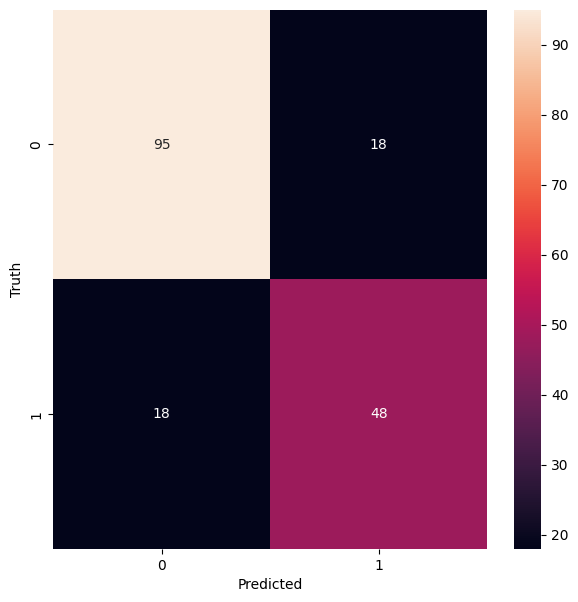

In [46]:
import seaborn as sn 
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
sn.heatmap(cn,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')